In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
class GeneticAlgorithm:
    def __init__(self, distances, n_population=10, n_generations=100, mutation_rate=0.01):
        self.distances = distances
        self.n_population = n_population
        self.n_generations = n_generations
        self.mutation_rate = mutation_rate
        self.population = [np.random.permutation(len(distances)) for _ in range(n_population)]

    def fitness(self, chromosome):
        return sum(self.distances[chromosome[i], chromosome[(i + 1) % len(chromosome)]] for i in range(len(chromosome)))

    def select(self, population, tournament_size=3):
        tournament = random.sample(population, tournament_size)
        best_individual = min(tournament, key=self.fitness)
        return best_individual

    def crossover(self, parent1, parent2):
        size = len(parent1)
        idx1, idx2 = sorted(random.sample(range(size), 2))
        new_child = parent1[idx1:idx2]
        new_child = np.concatenate((new_child, [city for city in parent2 if city not in new_child]))
        return new_child

    def mutate(self, chromosome):
        idx1, idx2 = random.sample(range(len(chromosome)), 2)
        chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
        return chromosome

    def run(self):
        for _ in range(self.n_generations):
            new_population = []
            for _ in range(len(self.population)):
                parent1, parent2 = self.select(self.population), self.select(self.population)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)
            self.population = sorted(new_population, key=self.fitness)
        return min(self.population, key=self.fitness)

def generate_random_cities(n_cities):
    np.random.seed(0)  # Để kết quả có thể lặp lại
    cities = np.random.rand(n_cities, 2) * 100  # Tạo ngẫu nhiên tọa độ cho các thành phố trong một phạm vi 0-100
    distances = np.zeros((n_cities, n_cities))  # Khởi tạo ma trận khoảng cách
    city_names = [f"City {i}" for i in range(n_cities)]  # Tạo tên các thành phố

    # Tính toán và làm tròn khoảng cách giữa các thành phố
    for i in range(n_cities):
        for j in range(n_cities):
            distance = np.linalg.norm(cities[i] - cities[j])
            distances[i][j] = np.round(distance)

    return distances, city_names, cities


Best route:  [1 6 3 9 4 7 8 2 0 5]
Best distance:  414.0
Execution time: 1.99 seconds


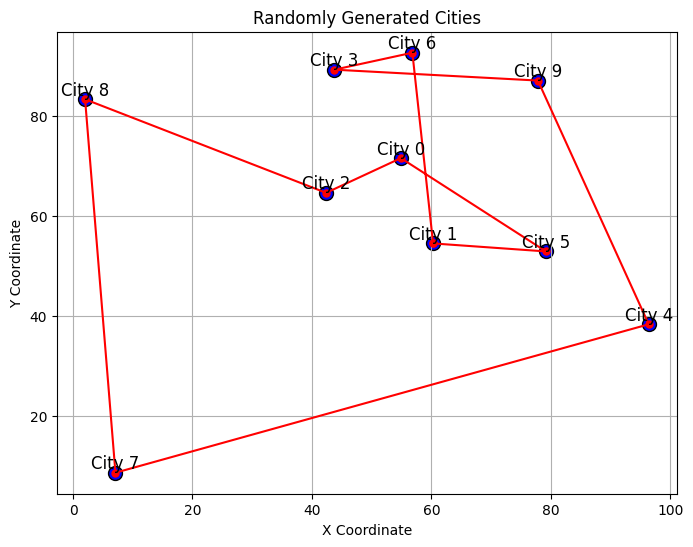

In [206]:
# Sử dụng hàm để tạo ma trận khoảng cách và tên các thành phố
distances, city_names, cities = generate_random_cities(10)

# Sử dụng ma trận khoảng cách để chạy thuật toán di truyền
start_time = time.time()

genetic_algorithm = GeneticAlgorithm(distances, n_population=50, n_generations = 200, mutation_rate = 0.3)
best_route = genetic_algorithm.run()
end_time = time.time()
print("Best route: ", best_route)
print("Best distance: ", genetic_algorithm.fitness(best_route))
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

# Vẽ các thành phố
plt.figure(figsize=(8, 6))
plt.scatter(cities[:,0], cities[:,1], c='blue', edgecolors='black', s=100)
for i, city in enumerate(city_names):
    plt.text(cities[i,0], cities[i,1], city, fontsize=12, ha='center', va='bottom')
plt.title('Randomly Generated Cities')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Vẽ đường đi tốt nhất
route_coords = cities[best_route]
route_coords = np.append(route_coords, [route_coords[0]], axis=0)
plt.plot(route_coords[:,0], route_coords[:,1], linestyle='-', marker='o', markersize=5, color='red')

plt.grid(True)
plt.show()

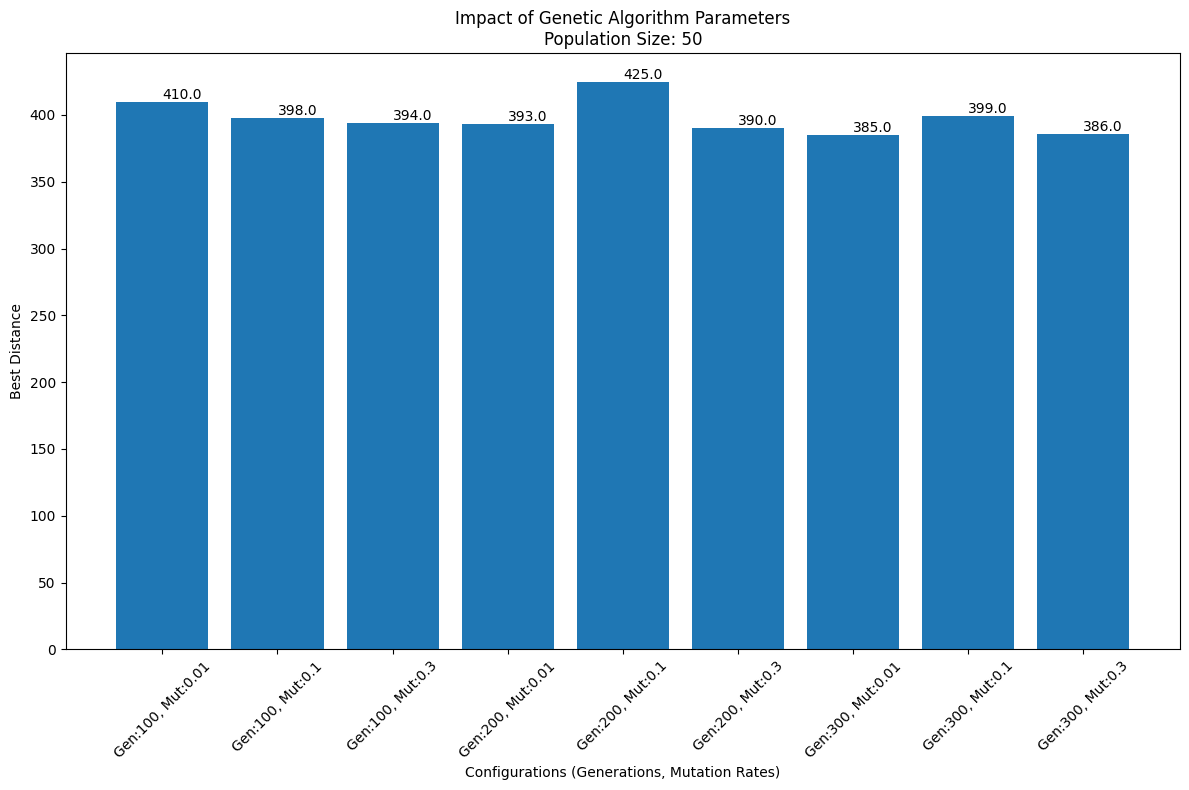

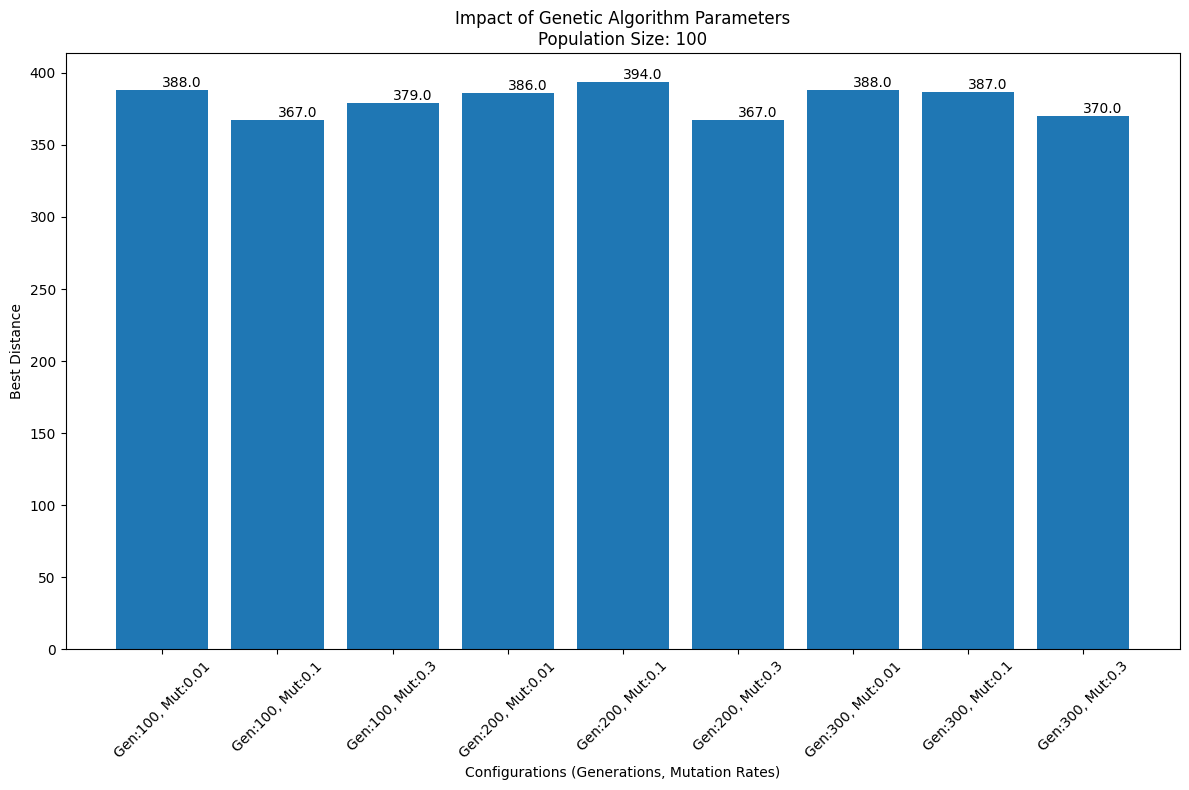

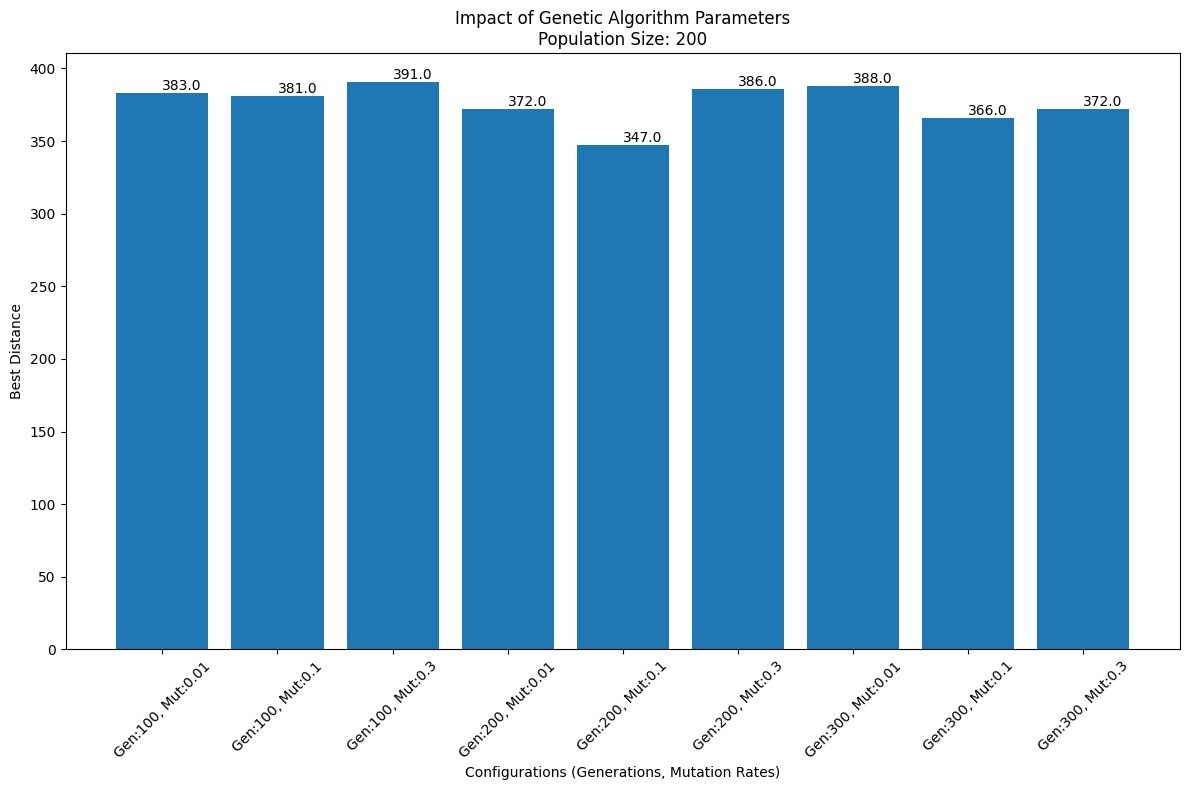

In [214]:
def run_experiment(populations, generations, mutation_rates, n_cities=10):
    results = []
    for n_population in populations:
        for n_generation in generations:
            for mutation_rate in mutation_rates:
                distances, city_names, cities = generate_random_cities(n_cities)
                ga = GeneticAlgorithm(distances, n_population, n_generation, mutation_rate)
                best_route = ga.run()
                best_distance = ga.fitness(best_route)
                results.append((n_population, n_generation, mutation_rate, best_distance))
    return results

populations = [50, 100, 200]
generations = [100, 200, 300]
mutation_rates = [0.01, 0.1, 0.3]
import matplotlib.pyplot as plt

# Chạy thử nghiệm
results = run_experiment(populations, generations, mutation_rates)

# Biểu đồ thay đổi của kết quả tối ưu tùy theo số lượng quần thể
for n_population in populations:
    filtered_results = [result for result in results if result[0] == n_population]
    distances = [result[3] for result in filtered_results]
    labels = [f"Gen:{result[1]}, Mut:{result[2]}" for result in filtered_results]
    plt.figure(figsize=(12, 8))
    bars = plt.bar(labels, distances)
    plt.xlabel('Configurations (Generations, Mutation Rates)')
    plt.ylabel('Best Distance')
    plt.title(f'Impact of Genetic Algorithm Parameters\nPopulation Size: {n_population}')

    # Thêm quãng đường trên các cột
    for bar, distance in zip(bars, distances):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(distance, 2), va='bottom')  # va: vertical alignment

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


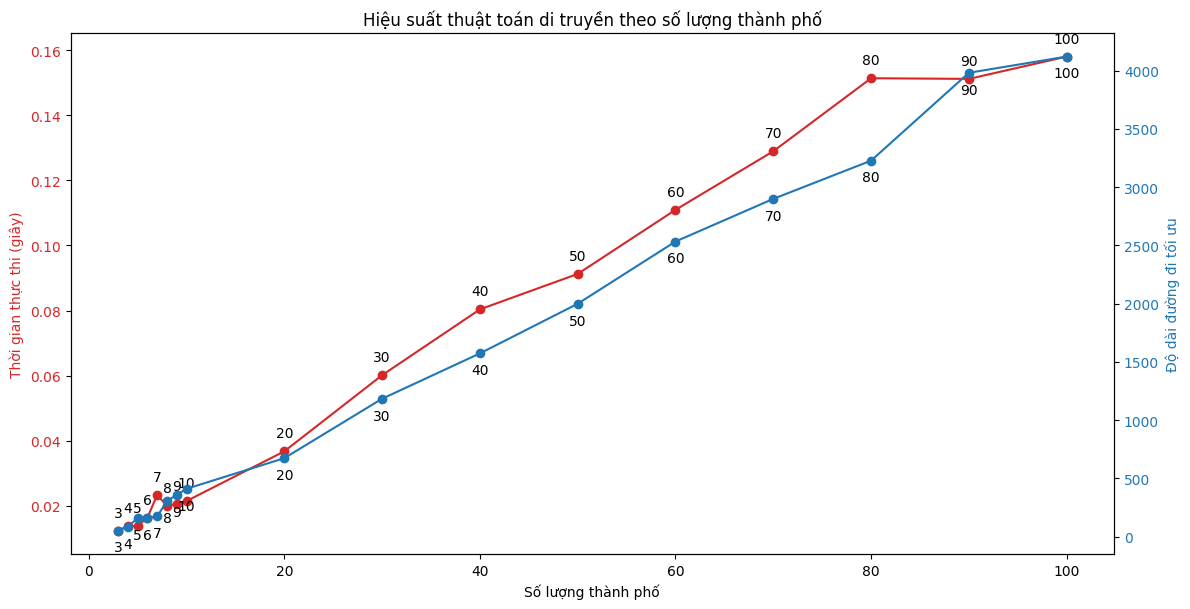

In [25]:
def measure_performance(city_counts, n_population=20, n_generations=10, mutation_rate=0.1):
    times = []
    best_distances = []
    for n_cities in city_counts:
        distances, _, cities = generate_random_cities(n_cities)
        start_time = time.time()
        ga = GeneticAlgorithm(distances, n_population, n_generations, mutation_rate)
        best_route = ga.run()
        end_time = time.time()
        execution_time = end_time - start_time
        best_distance = ga.fitness(best_route)
        times.append(execution_time)
        best_distances.append(best_distance)
    return times, best_distances

city_counts = [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
execution_times, best_distances = measure_performance(city_counts)

# Biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Số lượng thành phố')
ax1.set_ylabel('Thời gian thực thi (giây)', color=color)
ax1.plot(city_counts, execution_times, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Thêm nhãn cho mỗi điểm trên biểu đồ thời gian thực thi
for i, txt in enumerate(city_counts):
    ax1.annotate(f'{txt}', (city_counts[i], execution_times[i]), textcoords="offset points", xytext=(0,10), ha='center')

ax2 = ax1.twinx()  # Trục y mới chia sẻ cùng trục x
color = 'tab:blue'
ax2.set_ylabel('Độ dài đường đi tối ưu', color=color)
ax2.plot(city_counts, best_distances, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Thêm nhãn cho mỗi điểm trên biểu đồ độ dài đường đi
for i, txt in enumerate(city_counts):
    ax2.annotate(f'{txt}', (city_counts[i], best_distances[i]), textcoords="offset points", xytext=(0,-15), ha='center')

fig.tight_layout()
plt.title('Hiệu suất thuật toán di truyền theo số lượng thành phố')
plt.show()